In [35]:
import pandas as pd
import seaborn as srn
import statistics as sts
import numpy as np
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection

In [36]:
df = pd.read_csv('pns-reduzido-2019-notnull-full.csv')

In [37]:
#normalizando os valores para ficarem entre 0 e 1
from sklearn.preprocessing import MinMaxScaler
# Crie uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Ajuste o escalador aos seus dados e normalize-os
normalized_data = scaler.fit_transform(df)

# Crie um novo DataFrame com os dados normalizados
df1 = pd.DataFrame(normalized_data, columns=df.columns)
df1

,Unidade da Federação,"Algum médico ou profissional de saúde (como psiquiatra ou psicólogo) já lhe deu o diagnóstico de outra doença mental, como transtorno de ansiedade, síndrome do pânico, esquizofrenia, transtorno bipolar, psicose ou TOC (Transtorno Obsessivo Compulsivo) etc?","Em geral, em que grau essa doença mental limita as suas atividades habituais (tais como trabalhar, realizar afazeres domésticos etc.)?",Sexo,Cor ou raça,"De um modo geral, como é o estado de saúde de________",Com que frequência o(a) Sr(a) costuma consumir alguma bebida alcoólica?,Ano de nascimento,"Considerando saúde como um estado de bem-estar físico e mental, e não somente a ausência de doenças, como é o estado de saúde de _____________?",Algum médico já lhe deu algum diagnóstico de outra doença crônica (física ou mental) ou doença de longa duração (de mais de 6 meses de duração)?,Quando ____ consultou um médico pela última vez,O(A) Sr(a) visita o médico/serviço de saúde regularmente por causa dessa doença mental ou só quando tem algum problema?,"Atualmente, o(a) Sr(a) fuma algum produto do tabaco?",Diagnóstico de TOC (Transtorno obsessivo compulsivo)
0,0.000000,1.0,1.0,1.0,0.25,0.50,0.333333,0.500000,0.00,1.0,0.0,1.0,1.000000,0.0
1,0.000000,1.0,1.0,1.0,0.00,0.25,0.333333,0.740385,0.25,0.5,0.0,0.5,1.000000,0.0
2,0.000000,1.0,1.0,1.0,0.00,0.50,0.333333,0.403846,0.50,0.5,0.0,0.5,1.000000,1.0
3,0.000000,1.0,1.0,0.0,0.00,0.00,0.333333,0.807692,0.00,1.0,0.0,1.0,0.666667,0.0
4,0.000000,0.5,1.0,1.0,0.75,0.00,0.333333,0.288462,0.00,0.5,0.0,1.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7317,0.095238,0.0,0.0,1.0,0.75,0.50,0.000000,0.634615,0.25,0.0,0.0,0.0,0.000000,1.0
7318,0.928571,0.0,0.0,0.0,0.75,0.25,0.000000,0.721154,0.25,0.0,0.0,0.0,0.000000,1.0
7319,0.571429,0.0,0.0,1.0,0.00,0.50,0.000000,0.451923,0.50,0.0,0.0,0.0,0.000000,1.0
7320,0.023810,0.0,0.0,1.0,0.75,0.50,0.000000,0.865385,0.25,0.0,0.0,0.0,0.000000,1.0


In [86]:
indices = np.arange(len(df))
np.random.shuffle(indices)
df = df.iloc[indices]
X = df1.drop(columns=['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '])
Y = df1['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [88]:
# mudando de 100 para 150 ou 200 arvores não teve uma mudança significativa
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
forest_pred = clf.predict(x_test)
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))


[[1082   61]
 [ 248  806]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.88      1143
         1.0       0.93      0.76      0.84      1054

    accuracy                           0.86      2197
   macro avg       0.87      0.86      0.86      2197
weighted avg       0.87      0.86      0.86      2197



## XG BOOST

In [40]:
# Instalação de pacotes
# !pip install tensorflow
# !pip install xgboost

import tensorflow as tf
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


In [41]:
# GridSearch como classificador
model = XGBClassifier(
 learning_rate =1,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
n_estimators = [100, 1000]
max_depth = [1, 100]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)

In [42]:
# Adaptação do dataset para ter valores 0 = red e 1 = white
df1['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].replace(('red', 'white'), (1, 0), inplace=True)

seed = 42
array = df.values
test_size = 0.3

In [43]:
from sklearn.preprocessing import LabelEncoder


grid_result = grid_search.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Best: 0.898290 using {'max_depth': 1, 'n_estimators': 1000}
0.896815 (0.003162) with: {'max_depth': 1, 'n_estimators': 100}
0.898290 (0.004477) with: {'max_depth': 1, 'n_estimators': 1000}
0.877224 (0.004344) with: {'max_depth': 100, 'n_estimators': 100}
0.874158 (0.003032) with: {'max_depth': 100, 'n_estimators': 1000}


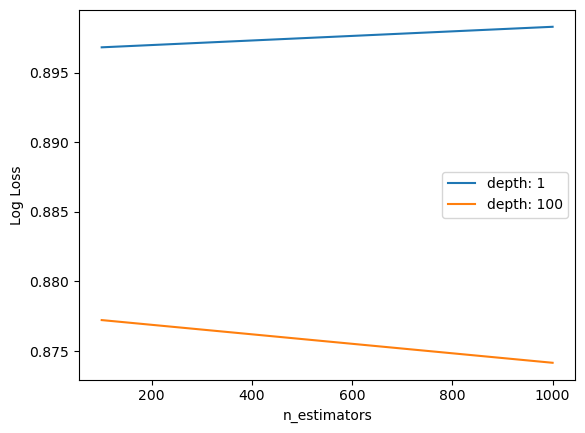

In [44]:
import matplotlib.pyplot as plt
# Exibição dos resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Plota os resultados
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()

## Estudando rede neural e fazendo testes com a biblioteca keras

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

# Crie o modelo da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])  # Camada de saída com 1 neurônio (para classificação binária)

# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treine o modelo
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
161/161 [==============================] - 2s 4ms/step - loss: 0.4399 - accuracy: 0.8248 - val_loss: 0.3420 - val_accuracy: 0.8589
Epoch 2/100
161/161 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8656 - val_loss: 0.3338 - val_accuracy: 0.8698
Epoch 3/100
161/161 [==============================] - 1s 4ms/step - loss: 0.3274 - accuracy: 0.8726 - val_loss: 0.3273 - val_accuracy: 0.8726
Epoch 4/100
161/161 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.8734 - val_loss: 0.3259 - val_accuracy: 0.8730
Epoch 5/100
161/161 [==============================] - 1s 4ms/step - loss: 0.3224 - accuracy: 0.8724 - val_loss: 0.3463 - val_accuracy: 0.8707
Epoch 6/100
161/161 [==============================] - 1s 5ms/step - loss: 0.3205 - accuracy: 0.8732 - val_loss: 0.3266 - val_accuracy: 0.8735
Epoch 7/100
161/161 [==============================] - 1s 4ms/step - loss: 0.3193 - accuracy: 0.8732 - val_loss: 0.3270 - val_accuracy: 0.8730

In [85]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Crie o modelo da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='tanh', input_shape=(X_train.shape[1],), kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='tanh', kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=1000, batch_size=256, validation_data=(x_test, y_test), verbose=0)

# Obtenha as previsões do modelo no conjunto de teste
Y_pred = model.predict(x_test)

# Converta as previsões em rótulos binários (0 ou 1)
Y_pred_binary = [1 if prediction > 0.5 else 0 for prediction in Y_pred]

# Obtenha o relatório de classificação para métricas detalhadas
classification_rep = classification_report(y_test, Y_pred_binary, target_names=['Classe 0', 'Classe 1'])

print("Relatório de Classificação:")
print(classification_rep)

69/69 [==============================] - 0s 4ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.81      0.99      0.89      1143
    Classe 1       0.98      0.75      0.85      1054

    accuracy                           0.87      2197
   macro avg       0.90      0.87      0.87      2197
weighted avg       0.89      0.87      0.87      2197



# TESTES 80- 20

In [63]:
indices = np.arange(len(df))
np.random.shuffle(indices)
df = df.iloc[indices]
X = df1.drop(columns=['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '])
Y = df1['Diagnóstico de TOC (Transtorno obsessivo compulsivo) ']
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

In [80]:
# o randomForest classifier usa 100 arvores por padrao -> utilizando 150 arvores não teve diferença significativa 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
forest_pred = clf.predict(x_test)
print(confusion_matrix(y_test, forest_pred))
print(classification_report(y_test, forest_pred))

[[712  39]
 [166 548]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       751
         1.0       0.93      0.77      0.84       714

    accuracy                           0.86      1465
   macro avg       0.87      0.86      0.86      1465
weighted avg       0.87      0.86      0.86      1465



In [65]:
# GridSearch como classificador
model = XGBClassifier(
 learning_rate =1,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
n_estimators = [100, 1000]
max_depth = [1, 100]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="roc_auc", n_jobs=-1, cv=kfold, verbose=1)

In [66]:
# Adaptação do dataset para ter valores 0 = red e 1 = white
df['Diagnóstico de TOC (Transtorno obsessivo compulsivo) '].replace(('red', 'white'), (1, 0), inplace=True)

seed = 42
array = df.values
test_size = 0.2

In [67]:
from sklearn.preprocessing import LabelEncoder


grid_result = grid_search.fit(X, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Best: 0.898290 using {'max_depth': 1, 'n_estimators': 1000}
0.896815 (0.003162) with: {'max_depth': 1, 'n_estimators': 100}
0.898290 (0.004477) with: {'max_depth': 1, 'n_estimators': 1000}
0.877224 (0.004344) with: {'max_depth': 100, 'n_estimators': 100}
0.874158 (0.003032) with: {'max_depth': 100, 'n_estimators': 1000}


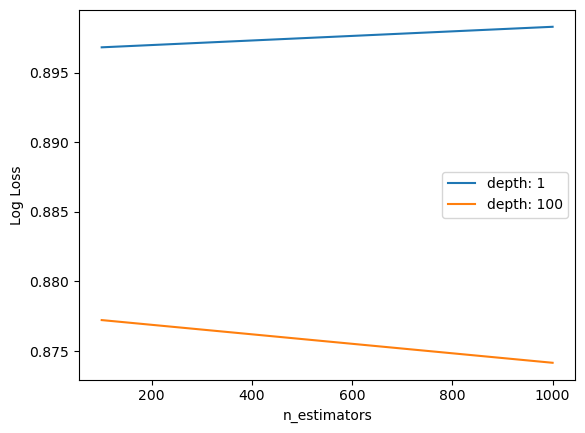

In [68]:
import matplotlib.pyplot as plt
# Exibição dos resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Plota os resultados
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.show()

In [81]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Crie o modelo da rede neural
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='tanh', input_shape=(X_train.shape[1],), kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='tanh', kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=1000, batch_size=128, validation_data=(x_test, y_test), verbose=0)

# Obtenha as previsões do modelo no conjunto de teste
Y_pred = model.predict(x_test)

# Converta as previsões em rótulos binários (0 ou 1)
Y_pred_binary = [1 if prediction > 0.5 else 0 for prediction in Y_pred]

# Obtenha o relatório de classificação para métricas detalhadas
classification_rep = classification_report(y_test, Y_pred_binary, target_names=['Classe 0', 'Classe 1'])

print("Relatório de Classificação:")
print(classification_rep)

46/46 [==============================] - 0s 5ms/step
Relatório de Classificação:
              precision    recall  f1-score   support

    Classe 0       0.81      0.85      0.83       751
    Classe 1       0.84      0.79      0.81       714

    accuracy                           0.82      1465
   macro avg       0.82      0.82      0.82      1465
weighted avg       0.82      0.82      0.82      1465

